# Designing and building SQL database

Design is being built here: https://dbdiagram.io/d/61fd59c585022f4ee53e2950

Database type: Microsoft SQL Server

Purpose: usage by the CRC team members

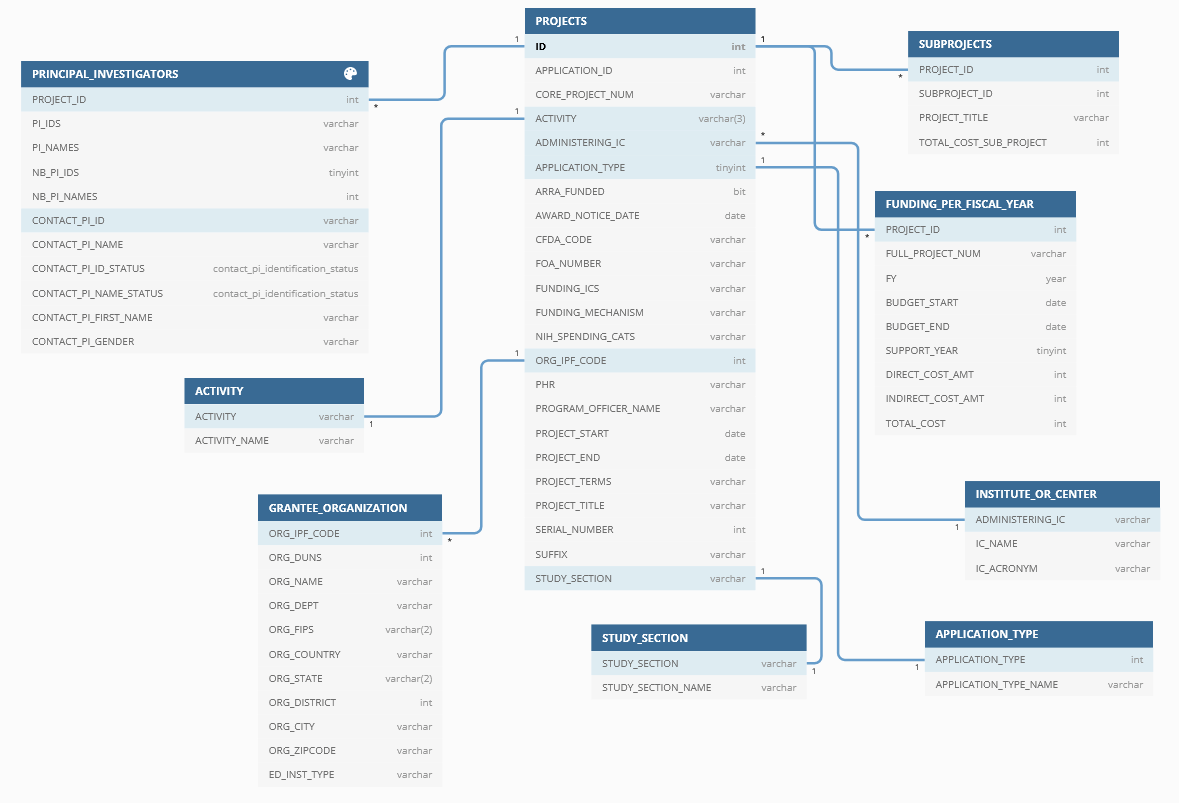

# Imports

In [1]:
import csv
import pandas as pd
from utils.csv_headers import *
from collections import OrderedDict

# Table creation

In [6]:
def filter_columns(source_file, target_file, subset_headers):
    
    subset_headers_set = set(subset_headers) #python parcourt un set plus vite qu'une liste
    
    with open(source_file, 'r', encoding='utf-8') as csv_file_descriptor:
        reader = csv.DictReader(csv_file_descriptor, delimiter=',', quotechar='"')

        with open(target_file, 'w', encoding='utf-8') as output_file:
            writer = csv.DictWriter(output_file, fieldnames=subset_headers, dialect=csv.excel)
            writer.writeheader()

            for row in reader:
                subset_row = {} #on garde l'ensemble des lignes mais on filtre sur les colonnes
                for key, value in row.items(): #la méthode .items crée une liste de tuples key, value [(k, v), ...]
                    if key in subset_headers_set:
                        subset_row[key] = value #syntaxe pour ajouter key, value au dictionnaire
                writer.writerow(subset_row)

                #autre syntaxe possible ci-dessous: dict comprehension
                #subset_row = {key: value for key, value in row.items() if key in projects_headers_set}


# ----------------------------------------------------------------------------------------------------------------
# TABLE PROJECTS

filter_columns('content/enhanced-output.csv', 'content/table-PROJECTS.csv', [
    APPLICATION_ID, 
    CORE_PROJECT_NUM, 
    ACTIVITY, 
    ADMINISTERING_IC, 
    APPLICATION_TYPE, 
    ARRA_FUNDED, 
    AWARD_NOTICE_DATE, 
    CFDA_CODE, 
    FOA_NUMBER, 
    FUNDING_ICS, 
    FUNDING_MECHANISM, 
    NIH_SPENDING_CATS, 
    ORG_IPF_CODE, 
    PHR, 
    PROGRAM_OFFICER_NAME, 
    PROJECT_START, 
    PROJECT_END, 
    PROJECT_TERMS, 
    PROJECT_TITLE, 
    SERIAL_NUMBER, 
    SUFFIX, 
    STUDY_SECTION])

# ----------------------------------------------------------------------------------------------------------------
# TABLE SUBPROJECTS

filter_columns('content/enhanced-output.csv', 'content/table-SUBPROJECTS.csv', [
    SUBPROJECT_ID, 
    PROJECT_TITLE, 
    TOTAL_COST_SUB_PROJECT])

# ----------------------------------------------------------------------------------------------------------------
# TABLE ACTIVITY

filter_columns('content/enhanced-output.csv', 'content/table-ACTIVITY.csv', [
    ACTIVITY, 
    'ACTIVITY_NAME']) #champ vide pour l'instant; à compléter depuis documentation du NIH

# ----------------------------------------------------------------------------------------------------------------
# TABLE APPLICATION_TYPE

filter_columns('content/enhanced-output.csv', 'content/table-APPLICATION_TYPE.csv', [
    APPLICATION_TYPE, 
    'APPLICATION_TYPE_NAME']) #champ vide pour l'instant; à compléter depuis documentation du NIH

# ----------------------------------------------------------------------------------------------------------------
# TABLE PRINCIPAL_INVESTIGATORS

filter_columns('content/enhanced-output.csv', 'content/table-PRINCIPAL_INVESTIGATORS.csv', [
    APPLICATION_ID, 
    PI_IDS, 
    PI_NAMES, 
    NB_PI_IDS, 
    NB_PI_NAMES, 
    CONTACT_PI_ID, 
    CONTACT_PI_NAME, 
    CONTACT_PI_FIRST_NAME, 
    CONTACT_PI_GENDER])

# ----------------------------------------------------------------------------------------------------------------
# TABLE FUNDING_PER_FISCAL_YEAR

filter_columns('content/enhanced-output.csv', 'content/table-FUNDING_PER_FISCAL_YEAR.csv', [
    APPLICATION_ID, 
    FULL_PROJECT_NUM, 
    FY, 
    BUDGET_START, 
    BUDGET_END, 
    SUPPORT_YEAR, 
    DIRECT_COST_AMT, 
    INDIRECT_COST_AMT, 
    TOTAL_COST])

# ----------------------------------------------------------------------------------------------------------------
# TABLE GRANTEE_ORGANIZATION

filter_columns('content/enhanced-output.csv', 'content/table-GRANTEE_ORGANIZATION.csv', [
    ORG_IPF_CODE, 
    ORG_DUNS, 
    ORG_NAME, 
    ORG_DEPT, 
    ORG_FIPS, 
    ORG_COUNTRY, 
    ORG_STATE, 
    ORG_DISTRICT, 
    ORG_CITY, 
    ORG_ZIPCODE, 
    ED_INST_TYPE])

# ----------------------------------------------------------------------------------------------------------------
# TABLE INSTITUTE_OR_CENTER

filter_columns('content/enhanced-output.csv', 'content/table-INSTITUTE_OR_CENTER.csv', [
    ADMINISTERING_IC, 
    IC_NAME, 
    'IC_ACRONYM']) #champ vide pour l'instant; à compléter depuis documentation du NIH

# ----------------------------------------------------------------------------------------------------------------
# TABLE STUDY_SECTION

filter_columns('content/enhanced-output.csv', 'content/table-STUDY_SECTION.csv', [
    STUDY_SECTION, 
    STUDY_SECTION_NAME])


## Approche testée mais rejetée

On conservera plutôt les titres des champs du NIH même s'ils manquent parfois de clarté, pour faciliter la mise à jour et reprise du projet par d'autres.

def rename_headers(source_file, target_file, renamed_header_dict):
    
    with open(source_file, 'r', encoding='utf-8') as csv_file_descriptor:
        reader = csv.DictReader(csv_file_descriptor, delimiter=',', quotechar='"')

        with open(target_file, 'w', encoding='utf-8') as output_file:
            writer = csv.DictWriter(output_file, fieldnames=renamed_header_dict.values(), dialect=csv.excel)
            writer.writeheader()

            for row in reader:
                new_row = {}
                for old_header, value in row.items():
                    new_header = renamed_header_dict[old_header] #syntaxe pour dire: prends la valeur sous la clé 'old_header'
                    new_row[new_header] = value #ajouter nouvelle clé, valeur au dictionnaire new_row
                writer.writerow(new_row)
    

def filter_and_rename(input_file, output_file, columns):    
    #appeler les deux autres fonctions
    temp_file_name = f'temp/{input_file}'
    
filter_and_rename('content/enhanced-output.csv', 'content/table-projects.csv', OrderedDict([
    (APPLICATION_ID, APPLICATION_ID),
    (CORE_PROJECT_NUM, CORE_PROJECT_NUM),
    (ACTIVITY, 'ACTIVITY_CODE'),
    (ADMINISTERING_IC, 'ADMINISTERING_IC_CODE'),
    (APPLICATION_TYPE, 'APPLICATION_TYPE_CODE'),
    (ARRA_FUNDED, ARRA_FUNDED)]))

TO DO

tester ce que le renamed_header_dict.values() fait, en créant un dictionnaire vide

grosso modo ça crée une liste avec les valeurs du renamed_header_dict (qui va devenir notre orderedDict quand on va appeler la fonction plus loin)
donc on va chercher le nouveau header qui est la valeur (on aurait fait renamed_header_dict.keys() si on avait voulu la clé, i.e. anciens headers)
optionnellement rajouter avec un .lower()

ensuite, continuer avec la fonction filter_and_rename
puis compléter le orderedDict avec tous les headers pour la table Projects